In [131]:
import pandas as pd
import numpy as np
df=pd.read_csv('titanic.csv')

In [132]:
df=df.drop(['PassengerId','Name','SibSp', 'Ticket','Cabin','Embarked','Parch'],axis='columns')
df.head()

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500


In [133]:
inputs=df.drop(['Survived'],axis='columns')
inputs.head()

,Pclass,Sex,Age,Fare
0,3,male,22.0,7.2500
1,1,female,38.0,71.2833
2,3,female,26.0,7.9250
3,1,female,35.0,53.1000
4,3,male,35.0,8.0500


In [134]:
target=df.Survived
target.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [135]:
dummies=pd.get_dummies(inputs.Sex)
dummies.head()

,female,male
0,False,True
1,True,False
2,True,False
3,True,False
4,False,True


In [136]:
inputs=pd.concat([inputs,dummies],axis='columns')
inputs=inputs.drop(['Sex'],axis='columns')
inputs.head(10)

,Pclass,Age,Fare,female,male
0,3,22.0,7.2500,False,True
1,1,38.0,71.2833,True,False
2,3,26.0,7.9250,True,False
3,1,35.0,53.1000,True,False
4,3,35.0,8.0500,False,True
5,3,NaN,8.4583,False,True
6,1,54.0,51.8625,False,True
7,3,2.0,21.0750,False,True
8,3,27.0,11.1333,True,False
9,2,14.0,30.0708,True,False


In [137]:
import math
inputs.Age.mean()
inputs.Age=inputs.Age.fillna(inputs.Age.mean())
inputs.head(10)

,Pclass,Age,Fare,female,male
0,3,22.000000,7.2500,False,True
1,1,38.000000,71.2833,True,False
2,3,26.000000,7.9250,True,False
3,1,35.000000,53.1000,True,False
4,3,35.000000,8.0500,False,True
5,3,29.699118,8.4583,False,True
6,1,54.000000,51.8625,False,True
7,3,2.000000,21.0750,False,True
8,3,27.000000,11.1333,True,False
9,2,14.000000,30.0708,True,False


In [138]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(inputs,target,test_size=0.2)

In [139]:
from sklearn.naive_bayes import GaussianNB
model=GaussianNB(priors=None,var_smoothing=1e-09)

In [140]:
model.fit(x_train,y_train)

GaussianNB()

In [141]:
model.score(x_test,y_test)

0.7486033519553073

In [142]:
model.predict(x_test)

array([0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0])

In [143]:
y_predict=model.predict(x_test)

In [129]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_predict,y_test)
cm

array([[89, 21],
       [16, 53]])

Text(95.72222222222221, 0.5, 'Truth')

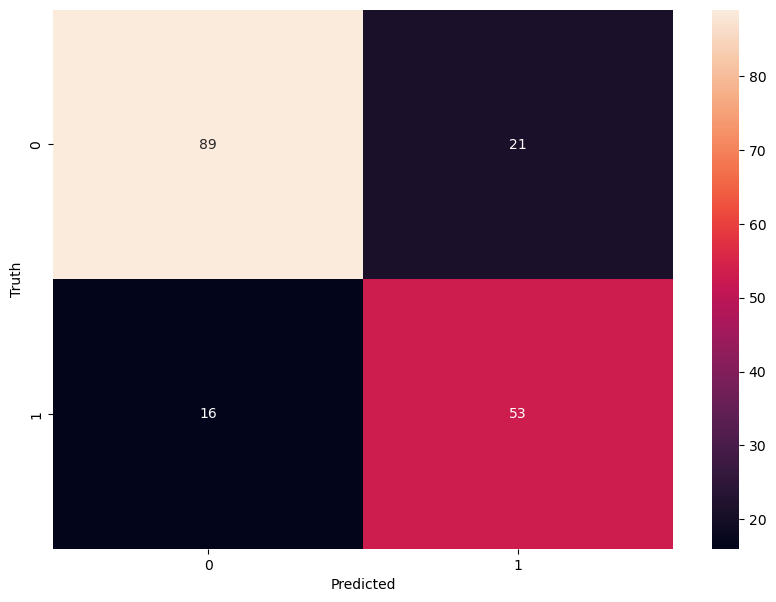

In [130]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')